# <i class="fas fa-circle" style="color: #f0ad4e;"></i> Model Evaluation & Scoring Matrices
<span style="background-color: #343A40; color: white; border-radius: 10px; padding-top: 2px; padding-bottom: 2px; padding-left: 6px;padding-right: 6px;">notebook</span>

In this excercise, you will see various model evaluation metrics provided in **scikit-learn**.

In scikit-learn, the default choice for classification is _accuracy_ which is a number of labels correctly classified and for regression is _r2 which is a coefficient of determination.

Scikit-learn has a _metrics_ module that provides other metrics that can be used for other purposes like when there is class imbalance etc. It also lets the user create custom evaluation metrics for a specific task.

We'll start by importing necessary libraries for our tutorial and setting few defaults.


**Note**: 
    In the following cells you will be using model(s) that you are not familar with yet. Don't worry about what happens in the models. You will have everything you need to do the tasks.    


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics, datasets, neighbors
import sys
import warnings
import itertools

warnings.filterwarnings("ignore")
np.set_printoptions(precision=2)
print("Python Verion : ", sys.version)
print("Scikit-Learn Version : ",sklearn.__version__)

%matplotlib inline


Python Verion :  3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]
Scikit-Learn Version :  1.0.2


## Classification Metrics
We'll be using scikit-learn's in-built methods to create the dataset and use various metrics to evaluate the performance of a model trained on that dataset. We'll create a classification dataset with 500 samples, 20 features, and 2 classes.


In [3]:
X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)


Dataset Size :  (500, 20) (500,)


### Preparation

We'll be splitting a dataset into train set(80% samples) and test set (20% samples).


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


We'll be using a simple LinearSVC model for training purpose. We'll then proceed to introduce various classification metrics which will be evaluating model performance on test data from various angles.


In [5]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(random_state=1, C=0.1)
linear_svc.fit(X_train, Y_train)


LinearSVC(C=0.1, random_state=1)

**Classification Accuracy**

It refers to number of true predictions divided by total number of samples.


In [21]:
Y_preds = linear_svc.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

print('Test Accuracy : %.3f'%(Y_preds == Y_test).mean())
print('Test Accuracy : %.3f'%linear_svc.score(X_test, Y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%linear_svc.score(X_train, Y_train))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Test Accuracy : 0.895
Test Accuracy : 0.895
Training Accuracy : 0.909


**Confusion Matrix**

For binary and multi-class classification problems, confusion matrix is another metrics which helps in indentifying which classes are easy to predict and which are hard to predict. It provides how many samples for each class are correctly classified and how many are confused with other classes.


In [22]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, Y_preds)
print(conf_mat)


[[178   2]
 [ 19   1]]


**Confusion Matrix** for binary classification problems has the below-mentioned structure.

[[TN, FP ]

[FN, TP ]]

- **TN** refers to True Negative which is the count of labels which were originally belonged to negative class and model also predicted them as negative.
- **FP** refers to False positive which is the count of labels which were actually belonged to negative class but model predicted them as positive.
- **FN** refers to False Negative which is the count of labels which were actually belonged to Positive Class but model predicted them as negative.
- **TP** refers to True Positive which is the count of labels predicted positive which were actually positive.
Below we are plotting the confusion matrix as it helps in interpreting results fast.


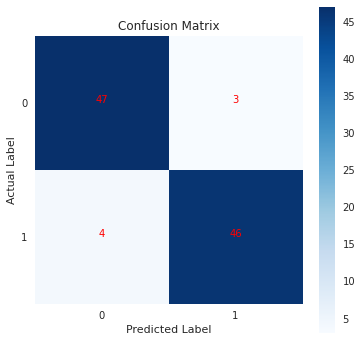

In [8]:
with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();


**Classification Report**

Classification report metrics provides precision, recall, f1-score and support for each class.

- **Precision** - It represents how many of predictions of particular class are actually of that class. 𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃).
- **Recall** - It represents how many predictions of particular class is right. 𝑅𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁).
- **f1-score** - It's geometric average of precision & recall. 𝐹1−𝑆𝑐𝑜𝑟𝑒=2∗(𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∗𝑟𝑒𝑐𝑎𝑙𝑙)/(𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑟𝑒𝑐𝑎𝑙𝑙)
support - It represents number of occurances of particular class in y_true


In [23]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

print('Precision                                   : %.3f'%precision_score(Y_test, Y_preds))
print('Recall                                      : %.3f'%recall_score(Y_test, Y_preds))
print('F1-Score                                    : %.3f'%f1_score(Y_test, Y_preds))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(Y_test, Y_preds))
print('\nClassification Report                       : ')
print(classification_report(Y_test, Y_preds))


Precision                                   : 0.333
Recall                                      : 0.050
F1-Score                                    : 0.087

Precision Recall F1-Score Support Per Class : 
 (array([0.9 , 0.33]), array([0.99, 0.05]), array([0.94, 0.09]), array([180,  20]))

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       180
           1       0.33      0.05      0.09        20

    accuracy                           0.90       200
   macro avg       0.62      0.52      0.52       200
weighted avg       0.85      0.90      0.86       200



The classification report is necessary when we want to analyze the performance of a model on individual classes. We want to check whether our model is not biassed towards one class. It helps in the case of <span style="color:red">unbalanced classes</span> as we can understand the performance of a model on individual class. We can further improve the performance of a model by analyzing the performance of it in individual classes using this report.

Let’s go below through imbalanced class scenario to understand more and introduce the concept pf ROC Curves. We'll create a new dataset of 1000 samples, 10 classes and make it an imbalance for our purpose.


In [24]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)
print('Dataset Size : ',X.shape, Y.shape)


Dataset Size :  (1000, 20) (1000,)


Below we are creating imbalance by marking all samples with value 0 as True and remaining all classes as False. In our dataset, 10% of values belong to class 0 and the remaining 90% to other classes.


In [25]:
Y = (Y == 0).astype(int) ## We are creating imbalanced classes here.


In [26]:
np.bincount(Y)/  len(Y) ## We can see here that one class is 90% of samples whereas another class represents only 10%


array([0.9, 0.1])

## Fitting models to imbalanced data

**Default SVC Model**

We'll be using the default <span style="color:red">SVC</span> model with scikit-learn's <span style="color:red">cross_val_score</span> method with cross-validation of 5 folds. It'll divide the dataset into 5 folds and take one of the fold as test data and remaining folds as train data. It'll then train the default SVC model on train data and evaluate performance on test data. It'll try it for all 5 combinations by taking one fold each time as a test set and remaining as a train set.


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

cross_val_score(SVC(), X, Y, cv=5)


array([0.91, 0.91, 0.92, 0.92, 0.91])


We can see that SVC with default parameters is giving 90% accuracy on average for 5-folds cross-validation.


**Default SVC Model**

We'll first try <span style="color:red">DummyClassifier</span> provided by scikit-learn which generally predicts the most occurring label as predicted label each time.


In [14]:
from sklearn.dummy import DummyClassifier

cross_val_score(DummyClassifier(strategy="most_frequent"), X, Y, cv=5)


array([0.9, 0.9, 0.9, 0.9, 0.9])

After trying DummyClassifier which predicts class which frequently occurs, We can see that even that classifier is also giving 90% accuracy. it can leave a person puzzled that how can both models are giving 90% accuracy whereas one is guessing the most frequent class. In this kind of scenario, classification report and ROC Curves can help much to identify the accuracy of our model on individual class.

We'll first split our dataset into train and test sets. We'll then check the performance of default SVC and DummyClassifier on predicting individual classes using classification reports. We'll then introduce the ROC Curves concept to get better insights into model performance.


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Train/Test Sizes :  (800, 20) (200, 20) (800,) (200,)


Below we are initializing defaults SVC model, training it and checking its performance on test data.


In [16]:
svc = SVC()
svc.fit(X_train, Y_train)

Y_preds = svc.predict(X_test)

print(classification_report(Y_test, Y_preds))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       180
           1       1.00      0.25      0.40        20

    accuracy                           0.93       200
   macro avg       0.96      0.62      0.68       200
weighted avg       0.93      0.93      0.90       200



We can see above that <span style="color:red">recall</span> is quite bad for class 1.

Below we are initializing the defaults DummyClassifier model, training it and checking its performance on test data.


In [17]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, Y_train)

Y_preds = dummy_classifier.predict(X_test)

print(classification_report(Y_test, Y_preds))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       180
           1       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



We can see above that DummyClassifier is performing quite bad in guessing class 1 as both  <span style="color:red">precision</span> and  <span style="color:red">recall</span> are really bad.


## Task 1)
The Matthews correlation coefficient (MCC) is defined as:
$$ MCC=\frac{TP \times TN-FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}} $$

- <i class="fas fa-code"></i> Calculate Matthews correlation coefficient (MCC) both for SVC model and DummyClassifier model


In [19]:
# Write your solution here.


MCC: 
 nan
MCC: 
 0.48038446141526137


**ROC Curves**

ROC(Receiver Operating Characteristic) Curve helps better understand the performance of the model when handling an unbalanced dataset. ROC Curve works with the output of prediction function by setting different threshold values to find out different false positives and true positive rates according to the threshold. In the case of SVC, for example, a threshold set for output of <span style="color:red">decision function</span> is 0 whereas ROC Curve tries various values for thresholds like [2,1,-1,-2] including negative threshold values as well. In the case of LogisticRegression, the default threshold is 0.5 and ROC will try default threshold values. For linear regression, the output is a probability between [0,1] hence threshold is set at 0.5 to differentiate positive/negative classes whereas in case of SVC internal kernel function returns value and threshold is set on that value for making a prediction.

**Note**: It's restricted to binary classification tasks.

The below plot is ROC Curve for SVM on the unbalanced dataset test set.


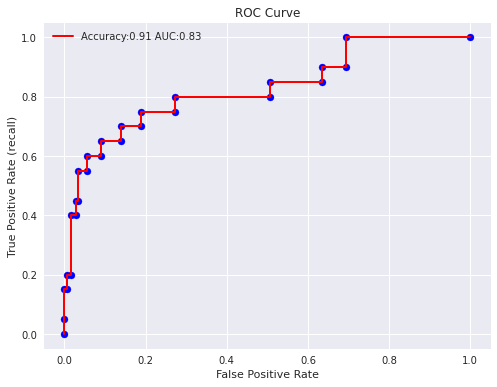

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

decision_function = svc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, decision_function)
acc = svc.score(X_test, Y_test)
auc = roc_auc_score(Y_test, svc.decision_function(X_test))

with plt.style.context(('ggplot','seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(fpr, tpr, c='blue')
    plt.plot(fpr, tpr, label="Accuracy:%.2f AUC:%.2f" % (acc, auc), linewidth=2, c='red')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    plt.title('ROC Curve')
    plt.legend(loc='best');


**Precision-Recall Curve**

Precision and Recall helps a lot in case of imbalanced datasets. Plotting different values of precision vs recall by setting different thresholds helps in evaluating the performance of the model better in case of imbalance classes. It does not take into consideration true negatives as it's majority class and True positives represent minority class which has quite a few occurrences.

The below plot is Precision-Recall Curve for SVM on the unbalanced dataset test set.


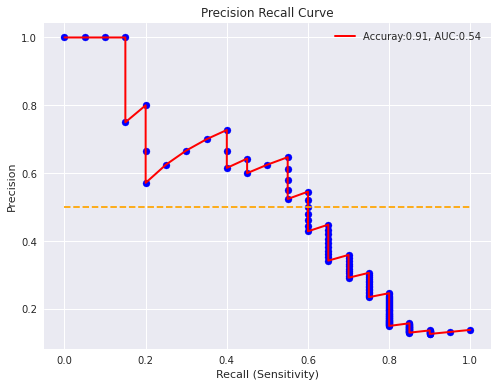

In [28]:
from sklearn.metrics import precision_recall_curve, auc,average_precision_score

decision_function = svc.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(Y_test, decision_function)
acc = svc.score(X_test, Y_test)
p_auc = auc(recall, precision)

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(recall, precision, c='blue')
    plt.plot(recall, precision, label="Accuray:%.2f, AUC:%.2f" % (acc, p_auc), linewidth=2, c='red')
    plt.hlines(0.5,0.0,1.0, linestyle='dashed', colors=['orange'])
    plt.xlabel("Recall (Sensitivity)")
    plt.ylabel("Precision")
    plt.title('Precision Recall Curve')
    plt.legend(loc='best');


Precision-recall curve  does not show a "standard" shape of a Precision-recall  curve when using an imbalanced dataset. Notice that AUC in the precison recall curve is around 50% and whereas AUC in the ROC curve is around 90%. This shows that the ROC curves sometimes give optimistic results hence it may be better to use precision recall curves as well in case of imbalanced datasets.


## Task 2)

You have to extend the cell below to train a logistic regression model on breast_cancer dataset.  

In the code marked with "TODO" to 
- <i class="fas fa-code"></i> Calculate Precsion, Recall and f1-score using yhat
- <i class="fas fa-code"></i> Plot the  ROC curve using yhat_prob and calculate area under the curve (AUC) 
- <i class="fas fa-code"></i> Precsion-Recall curve using yhat_prob area under the curve (Average Precision)


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc,average_precision_score

# Load dataset
data=load_breast_cancer()
X=data.data
y=data.target

# Split the data set to test and tarin sets
X_train,X_test,y_train,y_test=train_test_split(X,y)

# Train logistic regression model
LR=LogisticRegression()
LR.fit(X_train,y_train)


yhat=LR.predict(X_test)

yhat_prob=LR.predict_proba(X_test)

# TODO ..
# 1) Calculate Precsion, Recall and f1-score using yhat
# 2) Plot the  ROC curve , caclulate AUC
# 3) Precsion-Recall curve, Calculate  Average precision 




Precision                                   : 0.965
Recall                                      : 0.954
F1-Score                                    : 0.960

Precision Recall F1-Score Support Per Class : 
 (array([0.93, 0.97]), array([0.95, 0.95]), array([0.94, 0.96]), array([56, 87]))

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.97      0.95      0.96        87

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



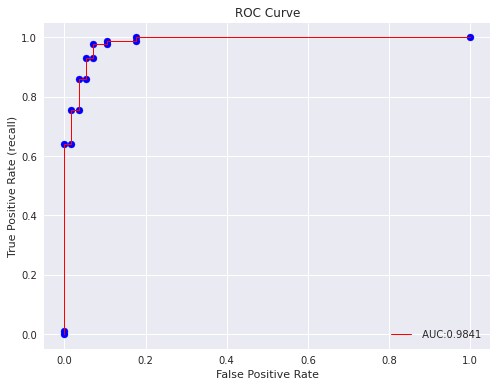

In [89]:
# Write the code for the ROC curve here.


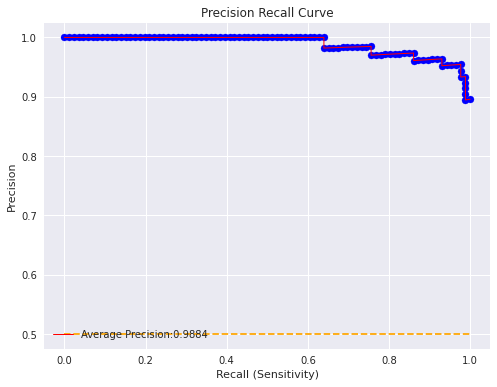

In [92]:
# Write the code for the precision/recall curve here.
